> 📌 **Nota de autoría:**  
> Este notebook está basado en el material provisto por el profesor **Matías Barreto**  
> para la materia **Técnicas de Procesamiento de Imágenes** (IFTS N.º 24 – 2025).  
> El contenido fue complementado con explicaciones teóricas, comentarios y recursos adicionales  
> por Cynthia Villagra, con asistencia de herramientas como **ChatGPT** y bibliografía de libre acceso. 


# 🧠 Introducción al uso de imágenes con scikit-image

En este notebook vamos a trabajar con imágenes usando `scikit-image`, una librería muy potente para análisis y procesamiento de imágenes. Utilizaremos funciones para:

- Cargar imágenes de ejemplo (como la del astronauta).
- Analizar el tipo de datos y estructura de una imagen.
- Mostrar imágenes en pantalla con Matplotlib.
- Convertir entre arrays de NumPy e imágenes reales.

**¿Qué es una imagen digital en este contexto?**

- Una imagen es una **matriz NumPy** de 3 dimensiones: alto, ancho y canales de color.
- Cada canal representa un color (rojo, verde, azul) y contiene valores entre 0 y 255.

Vamos a ver cómo se representa y cómo se manipula una imagen desde código.


#Procesamiento de Imágenes con scikit-image y scipy

###Objetivo: Aprender a leer, convertir y manipular imágenes usando scikit-image y scipy, con énfasis en espacios de color, formatos y estructuras de datos.

##1. Configuración Inicial

In [1]:
!pip install scikit-image scipy --quiet  # Instalar si es necesario  # Instala las librerías necesarias: scikit-image y scipy (solo si no están)
from skimage import io, color, data  # Importa funciones de scikit-image para cargar y manipular imágenes
from scipy import misc  # Importa funciones de scipy (misc se usaba para imágenes en versiones viejas)
import numpy as np  # Importa NumPy para trabajar con matrices numéricas
import matplotlib.pyplot as plt  # Importa matplotlib para mostrar imágenes
from PIL import Image  # Importa PIL para manipulación de imágenes
#from google.colab import files  # Importa funciones para subir archivos en Google Colab

ERROR: Invalid requirement: '#'
You should consider upgrading via the 'c:\users\misse\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


##2. Lectura y Visualización de Imágenes

A. Usando scikit-image

In [2]:
#mUsar imagen de ejemplo (astronauta)
im = data.astronaut()  # Carga una imagen de ejemplo (foto de un astronauta) como array de NumPy
print("Tipo:", type(im), "Dimensiones:", im.shape, "Rango de valores:", im.dtype)  # Muestra el tipo, las dimensiones y el tipo de dato de la imagen
# Salida: <class 'numpy.ndarray'> (512, 512, 3) uint8

Tipo: <class 'numpy.ndarray'> Dimensiones: (512, 512, 3) Rango de valores: uint8



### 🧪 Cargar imágenes de ejemplo

La función `data.astronaut()` nos permite obtener una imagen de prueba que viene incluida en `scikit-image`.

```python
im = data.astronaut()
```

La imagen se carga como un **array de NumPy**, lo que nos permite acceder a su contenido pixel a pixel. También se imprimen sus propiedades para conocer su estructura:
- `type`: clase del objeto (`numpy.ndarray`).
- `shape`: dimensiones de la imagen (alto, ancho, canales).
- `dtype`: tipo de datos (usualmente `uint8`, valores entre 0-255).


Visualizar:

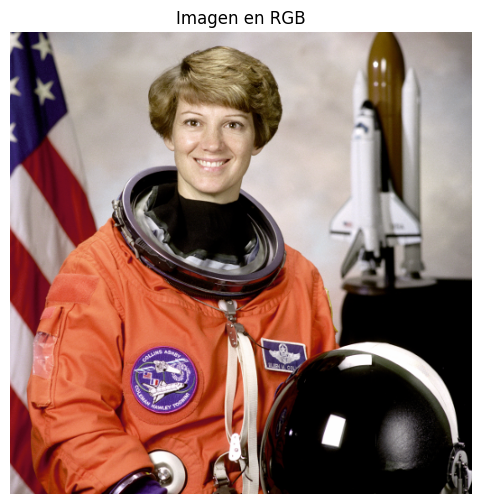

In [3]:
plt.figure(figsize=(8, 6))
plt.imshow(im)  # Muestra la imagen con matplotlib
plt.axis('off')  # Oculta los ejes
plt.title("Imagen en RGB")  # Título para la imagen
plt.show()  # Muestra el gráfico con la imagen

B. Usando scipy.misc (solo para versiones antiguas)

C:\Users\misse\AppData\Local\Temp\ipykernel_2888\309254214.py:2: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  im = misc.face()  # Obsoleto en versiones recientes de SciPy


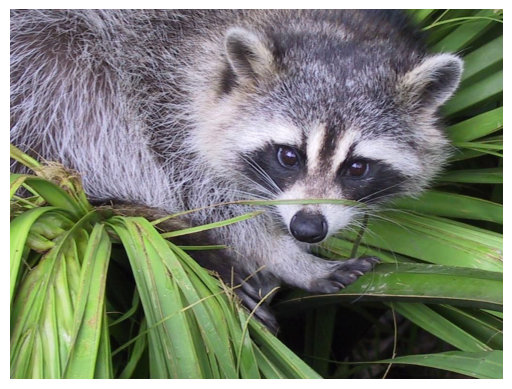

(<matplotlib.image.AxesImage at 0x26d4d7f14c0>,
 (-0.5, 1023.5, 767.5, -0.5),
 None)

In [4]:
# Cargar imagen de ejemplo (cara de mapache)
im = misc.face()  # Obsoleto en versiones recientes de SciPy
plt.imshow(im), plt.axis('off'), plt.show()  # Muestra la imagen con matplotlib

## 3. Conversiones entre Espacios de Color
A. RGB a HSV (Matiz, Saturación, Valor)

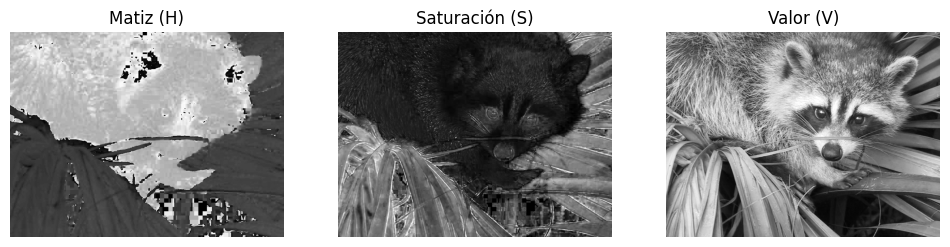

In [5]:
im_hsv = color.rgb2hsv(im)  # Convertir a HSV

# Visualizar canales por separado
plt.figure(figsize=(12, 4))
canales = ['Matiz (H)', 'Saturación (S)', 'Valor (V)']
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(im_hsv[:, :, i], cmap='gray')  # Muestra la imagen con matplotlib
    plt.title(canales[i])  # Título para la imagen
    plt.axis('off')  # Oculta los ejes
plt.show()  # Muestra el gráfico con la imagen

B. Modificar Saturación

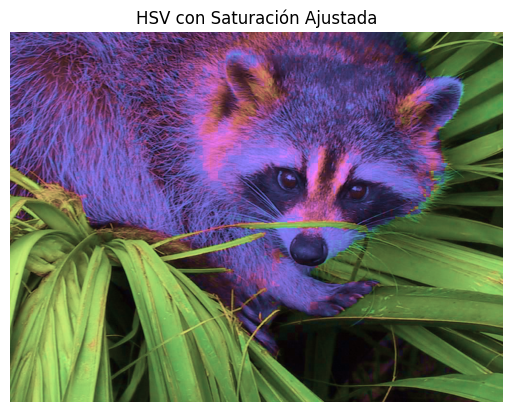

In [6]:
im_hsv_mod = im_hsv.copy()
im_hsv_mod[:, :, 1] = 0.5  # Ajustar saturación al 50%
im_rgb_mod = color.hsv2rgb(im_hsv_mod)  # Volver a RGB

plt.imshow(im_rgb_mod)  # Muestra la imagen con matplotlib
plt.title("HSV con Saturación Ajustada")  # Título para la imagen
plt.axis('off')  # Oculta los ejes
plt.show()  # Muestra el gráfico con la imagen

##4. Manipulación de Formatos y Tipos de Imagen
A. Convertir entre Formatos (PNG → JPG)

In [7]:
# Usando PIL (para manejar modos como RGBA)
im_pil = Image.fromarray(im)  # Convierte el array NumPy de nuevo a imagen para mostrarla o guardarla
im_pil.save("imagen.jpg")  # Conversión automática a RGB si es RGBA
files.download("imagen.jpg")

NameError: name 'files' is not defined

B. Convertir a Escala de Grises

Shape: (768, 1024)


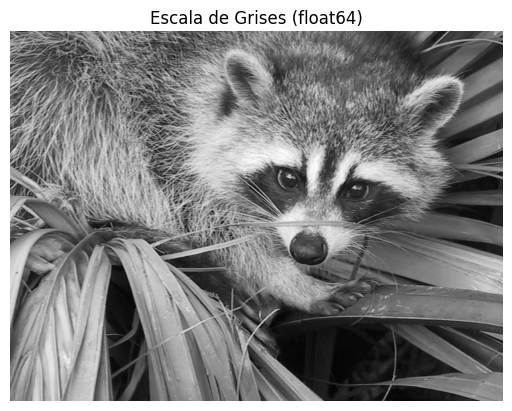

In [8]:
im_gris = color.rgb2gray(im)  # scikit-image (rango 0-1)
print("Shape:", im_gris.shape)  # (alto, ancho)

# Mostrar
plt.imshow(im_gris, cmap='gray')  # Muestra la imagen con matplotlib
plt.title("Escala de Grises (float64)")  # Título para la imagen
plt.axis('off')  # Oculta los ejes
plt.show()  # Muestra el gráfico con la imagen

Ejercicio 1:

¿Qué pasa si convertimos una imagen RGB a escala de grises usando solo el canal rojo (im[:, :, 0])? Comparar con rgb2gray.

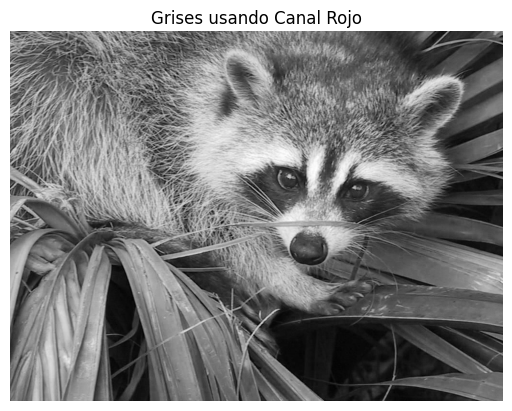

In [9]:
im_gris_rojo = im[:, :, 0]  # Solo canal R
plt.imshow(im_gris_rojo, cmap='gray')  # Muestra la imagen con matplotlib
plt.title("Grises usando Canal Rojo")  # Título para la imagen
plt.axis('off')  # Oculta los ejes
plt.show()  # Muestra el gráfico con la imagen

##6. Estructuras de Datos y Conversiones

A. De PIL a NumPy (y viceversa)

In [10]:
# PIL → NumPy
im_pil = Image.open("imagen.jpg")
im_np = np.array(im_pil)  # Convertir a ndarray

# NumPy → PIL
im_np = data.astronaut()  # Carga una imagen de ejemplo (foto de un astronauta) como array de NumPy
im_pil = Image.fromarray(im_np)  # Convierte el array NumPy de nuevo a imagen para mostrarla o guardarla


### 🧪 Cargar imágenes de ejemplo

La función `data.astronaut()` nos permite obtener una imagen de prueba que viene incluida en `scikit-image`.

```python
im = data.astronaut()
```

La imagen se carga como un **array de NumPy**, lo que nos permite acceder a su contenido pixel a pixel. También se imprimen sus propiedades para conocer su estructura:
- `type`: clase del objeto (`numpy.ndarray`).
- `shape`: dimensiones de la imagen (alto, ancho, canales).
- `dtype`: tipo de datos (usualmente `uint8`, valores entre 0-255).


## 7. Resumen de Funciones Clave

| Operación | Función | Biblioteca |
|---|---|---|
| Leer imagen | `io.imread()` | scikit-image |
| RGB a HSV | `color.rgb2hsv()` | scikit-image |
| Escala de grises | `color.rgb2gray()` | scikit-image |
| Guardar imagen | `Image.save()` | PIL |
| Visualizar múltiples imágenes | `io.imshow_collection()` | scikit-image |